# Gradient Clipping in Keras

<ol>1. Loading the dataset</ol>
<ol>2. Pre-processing the data</ol>
<ol>3. Creating training and validation set</ol>
<ol>4. Defining the model architecture</ol>
<ol>5. Compiling the model</ol>
<ol> <ol>* Define clipvalue while defining the optimizer</ol></ol>
<ol>6. Training the model</ol>
<ol>7. Evaluating model performance</ol>

## 1. Loading the dataset

In [2]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [3]:
# reading the csv file
data = pd.read_csv('Dataset/emergency_classification.csv')

In [4]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [5]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

## 2. Pre-processing the data

In [6]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [7]:
# normalizing the pixel values
X = X / X.max()

# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(0.0, 1.0)

## 3. Creating training and validation set

In [8]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [9]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

## 4. Defining the model architecture

In [10]:
# defining the model architecture with dropout layer
model=Sequential()

model.add(InputLayer(shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

## 5. Compiling the model

In [11]:
# defining the adam optimizer and setting the learning rate as 10^-5 and adding clip value to clip the gradients
adam = Adam(learning_rate=1e-5, clipvalue=1)

In [ ]:
#optimizer = Adam(learning_rate=0.001, clipnorm=1.0)


In [12]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

## 6. Training the model

In [13]:
# training the model for 100 epochs

model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 271ms/step - accuracy: 0.5212 - loss: 0.7074 - val_accuracy: 0.5609 - val_loss: 0.7054
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - accuracy: 0.5748 - loss: 0.6879 - val_accuracy: 0.5609 - val_loss: 0.6754
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.5853 - loss: 0.6673 - val_accuracy: 0.5878 - val_loss: 0.6604
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 202ms/step - accuracy: 0.6169 - loss: 0.6556 - val_accuracy: 0.6388 - val_loss: 0.6483
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - accuracy: 0.6529 - loss: 0.6391 - val_accuracy: 0.6756 - val_loss: 0.6371
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - accuracy: 0.6763 - loss: 0.6309 - val_accuracy: 0.6700 - val_loss: 0.6303
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 204ms/step - accuracy: 0.6818 - loss: 0.6255 - val_accuracy: 0.6813 - val_loss: 0.6243
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - accuracy: 0.6818 - loss: 0.6238 - val_accu

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.8126 - loss: 0.4795 - val_accuracy: 0.7082 - val_loss: 0.5560
Epoch 52/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.8197 - loss: 0.4721 - val_accuracy: 0.6983 - val_loss: 0.5718
Epoch 53/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 202ms/step - accuracy: 0.8273 - loss: 0.4649 - val_accuracy: 0.7096 - val_loss: 0.5588
Epoch 54/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - accuracy: 0.8437 - loss: 0.4510 - val_accuracy: 0.7096 - val_loss: 0.5551
Epoch 55/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - accuracy: 0.8295 - loss: 0.4657 - val_accuracy: 0.7096 - val_loss: 0.5624
Epoch 56/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - accuracy: 0.8359 - loss: 0.4528 - val_accuracy: 0.7096 - val_loss: 0.5522
Epoch 57/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.8328 - loss: 0.4602 - val_accuracy: 0.7153 - val_loss: 0.5507
Epoch 58/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 229ms/step - accuracy: 0.8364 - loss: 0.4573 - val_accuracy:

## 7. Evaluating model performance 

In [14]:
prediction = model.predict(X_valid)
prediction = prediction.reshape(706,)

# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(np.int)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


C:\Users\Milan Amrut Joshi\AppData\Local\Temp\ipykernel_29240\1715179869.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int = prediction_int.astype(np.int)


In [15]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, prediction_int), '%')

Accuracy on validation set: 0.7280453257790368 %


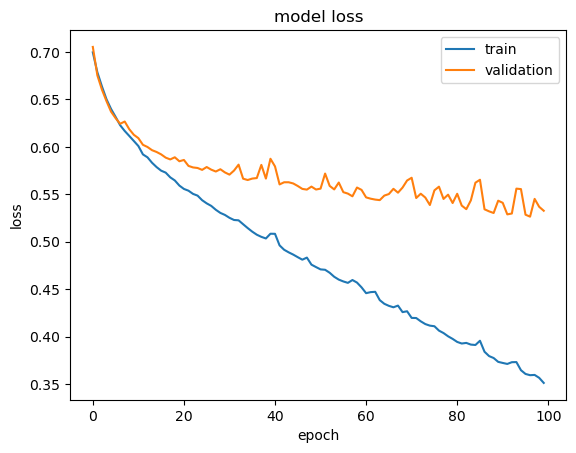

In [16]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()